# Section 0: TA Feedback

- Score: 26.8/30

Feedback:
- Use full sentences when writing
- Incorrect type for some variables
- Question should consider as many input variables as possible
- Avoid using the word "affect", as it is misleading
- Comment on code to describe what's happening

Additions will be bolded
Crossed out parts are removed

# Section 1: Data Description (Group 36)

- **This dataset** covers data on user behaviour for online shopping on revenue generated during a user's session
- **The** goal **of the dataset** was to determine whether a user made a purchase
- **There were** 12330 sessions across all regions (observations)
- **Specifically in Region 1 there were** 4780 sessions ~~in Region 1~~
- 18 different variables

## Variables

- Administrative (Integer)
- Administrative_Duration (Integer)
- Informational (Integer)
- Informational_Duration (Integer)
- ProductRelated (Integer)
- ProductRelated_Duration (Continuous)
- BounceRates (Continuous)
- ExitRates (Continuous)
- PageValues (Integer)
- SpecialDay (Integer)
- Month (Categorical)
- OperatingSystems (**Categorical**~~Integer~~)
- Browser (**Categorical**~~Integer~~)
- Region (**Categorical**~~Integer~~)
- TrafficType (**Categorical**~~Integer~~)
- VisitorType (Categorical)
- Weekend (Binary)
- Revenue (Binary)

## Source and Information

- Source of Dataset: (https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset)
- data collection was done over a year, the "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" variables were found by tracking a user's movements on the website using the URL information to find the data. Google Analytics analyzed the "Bounce Rate", "Exit Rate" and "Page Value".

## Pre-Selection of Variables

- Region: We're only focusing on region 1, so this variable is useless
- OperatingSystems: Redundant, as the actual system used to operate has little to do with customer purchases
- Browser: Similar to OperatingSystems, has little connection to the system
Other variables are relevant

# Section 2: Scientific Question

## Question: How **are the variables related to** ~~does~~ the time **and user behaviour** ~~affect~~ **associated with** the probability of someone making an online purchase

- Response Variable: Revenue
- Exploratory Variables: SpecialDay, Month, Weekend, **Administrative, Administrative Duration, Informational, Informational Duration, Product Related, Product Related Duration, Visitor Type, Browser Type**
- This question is focused on inference, to understand the relationship with the significance of the day to making online purchases

# Section 3: Exploratory Data Analysis and Visualization

**Added all relevant libraries**

In [3]:
library(broom)
library(MASS)
library(glmbb)
library(cowplot)
library(tidyverse)
library(faraway)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::select()    masks MASS::select()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**Filtered to only use Region 1**

In [7]:
shopping <- read_csv("online_shoppers_intention.csv")
head(shopping)
shopping_1 <- shopping %>%
    filter(Region == 1) 
head(shopping_1)

Rows: 12330 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Month, VisitorType
dbl (14): Administrative, Administrative_Duration, Informational, Informatio...
lgl  (2): Weekend, Revenue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.0000,0.20000000,0.20000000,0,0.0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.0000,0.00000000,0.10000000,0,0.0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.5000,0.02000000,0.05000000,0,0.0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.2167,0.01578947,0.02456140,0,0.0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE
1,0,0,0,0,0.0000,0.20000000,0.20000000,0,0.0,Feb,1,2,1,5,Returning_Visitor,TRUE,FALSE
0,0,0,0,3,738.0000,0.00000000,0.02222222,0,0.4,Feb,2,4,1,2,Returning_Visitor,FALSE,FALSE


**Added the additional variables from the scientific questions. Selected only the variables that are important to the question.**

In [11]:
shopping_time <- shopping_1 %>%
    select(Revenue, Weekend, Month, SpecialDay, Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, VisitorType, Browser) %>%
    mutate(
    Month = factor(Month, 
                   levels = c("Jan","Feb","Mar","Apr","May","June","Jul",
                              "Aug","Sep","Oct","Nov","Dec")),
    Weekend = as.logical(Weekend),
    Revenue = as.logical(Revenue)
  )
head(shopping_time)

Revenue,Weekend,Month,SpecialDay,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,VisitorType,Browser
<lgl>,<lgl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
FALSE,FALSE,Feb,0.0,0,0,0,0,1,0.0000,Returning_Visitor,1
FALSE,FALSE,Feb,0.0,0,0,0,0,2,64.0000,Returning_Visitor,2
FALSE,TRUE,Feb,0.0,0,0,0,0,10,627.5000,Returning_Visitor,3
FALSE,FALSE,Feb,0.0,0,0,0,0,19,154.2167,Returning_Visitor,2
FALSE,TRUE,Feb,0.0,1,0,0,0,0,0.0000,Returning_Visitor,2
FALSE,FALSE,Feb,0.4,0,0,0,0,3,738.0000,Returning_Visitor,4


**Visualized the Purchase Rate compared to Month and Weekend**

`summarise()` has grouped output by 'Weekend'. You can override using the
`.groups` argument.


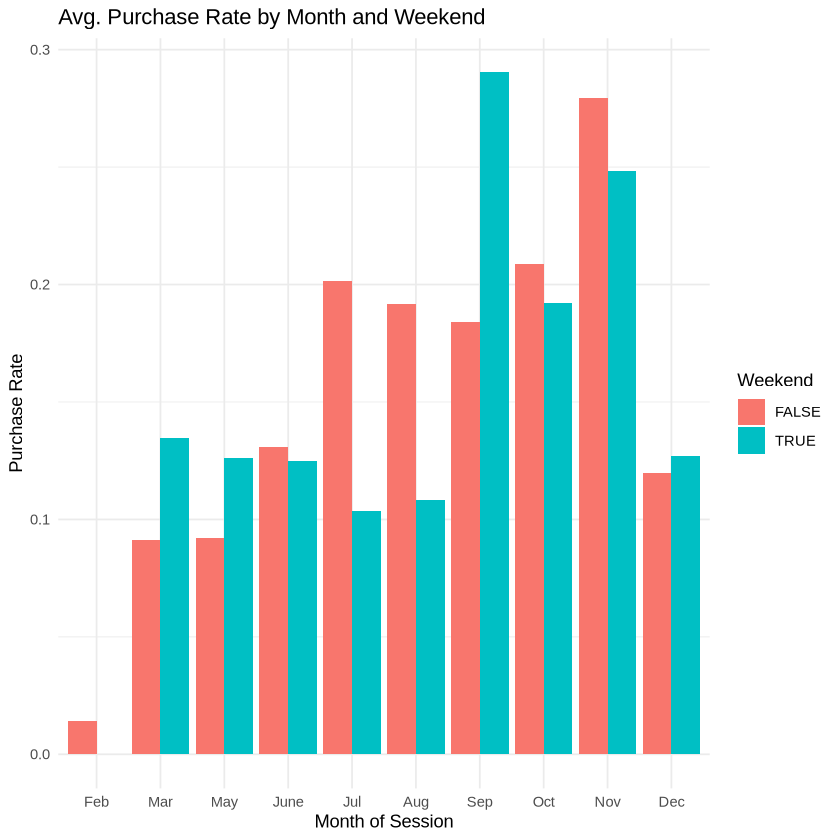

In [12]:
shopping_time_visualization <- shopping_time %>%
    group_by(Weekend, Month) %>%
    summarize(PurchaseRate = mean(Revenue, na.rm = TRUE)) %>%
    ggplot() +
    geom_col(aes(x = Month, y = PurchaseRate, fill = Weekend), position = "dodge") +
    ggtitle("Avg. Purchase Rate by Month and Weekend") +
    labs(
    x = "Month of Session",
    y = "Purchase Rate",
    fill = "Weekend"
      ) +
    theme_minimal()
shopping_time_visualization

## Interpretation

- has relevancy, as it covers the probability of purchase depending on both the month and whether it was the weekend or not. Shows that time of the year matters for purchase probability
- there are mixed results on weekend, as for some months purchasing on the weekend is more likely, while on others it's less likely
- January has no data and February has minimal, indicating either January and February are not popular times to shop, or data was collected after that point
- The highest purchase rate is during November, likely influenced by the holiday season
- This visualization shows that the month of the year is very relevant, while weekend doesn't have a clear pattern

# Section 4: Method and Plan

- The selected method is Logistic Regression
- Logistic Regression is appropriate because the response variable is binary, and the question is considering many different variables
- This method assumes every observation is independent, the variables are linearly related to the log odds of the response, and lack of multicollinearity
- Logistic Regression is only limited to nonlinear relationships, and is vulnerable to outliers.

# Section 5: Computational Code and Output

Used the model on the data, then made it a readable table

In [14]:
shopping_model <- glm(Revenue ~ Weekend + Month + SpecialDay + Administrative + Administrative_Duration + Informational + Informational_Duration + ProductRelated
                      + ProductRelated_Duration + VisitorType + Browser,
                      data = shopping_1,
                      family = binomial())
model_results <- tidy(shopping_model)
model_results

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-1.443713e+00,2.440381e-01,-5.91593152,3.300025e-09
WeekendTRUE,1.049375e-02,9.739714e-02,0.10774188,9.142004e-01
MonthDec,-4.090958e-01,2.520249e-01,-1.62323550,1.045391e-01
MonthFeb,-2.295008e+00,1.032378e+00,-2.22303086,2.621372e-02
MonthJul,9.625492e-02,3.106819e-01,0.30981820,7.566992e-01
MonthJune,-2.837349e-01,3.749384e-01,-0.75675074,4.491992e-01
MonthMar,-4.235328e-01,2.494281e-01,-1.69801565,8.950481e-02
MonthMay,-2.952571e-01,2.445459e-01,-1.20736909,2.272900e-01
MonthNov,5.339902e-01,2.286407e-01,2.33549934,1.951735e-02


## Interpretation

- many user behaviour predictors have a high association with purchase likelihood, like administrative, informational, and productRelated, suggesting more user engagement means a higher likelihood to buy
- returning customers are less likely to purchase, which is somewhat unexpected. This could mean they're browsing the site rather than buying something
- multiple month indicators are insignificant, and some don't have data
- The model addresses the question, as it shows the user behaviour predictors have a higher association, while the time indicators are relatively lower.